In [ ]:
# linear regression and Naive bayes to  predict survial of pasanger in titanic
# Author: Shubham Ghoshal
# Dataset linkl :

In [2]:
# Import Key Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [3]:

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=True) 

In [4]:
from jupyterthemes import jtplot

# Apply the 'grade3' theme
jtplot.style(theme='grade3', context='notebook', ticks=True, grid=False)


In [5]:
df = pd.read_csv("train.csv")

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [8]:
#data exploration

In [9]:
survived_df = df[df['Survived']==1]
not_survived = df[df['Survived']==0]

In [10]:
survived_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [11]:
print('total-' ,len(df) )
print('total survived - ',len(survived_df))
print('total not survived -',len(not_survived))


total- 891
total survived -  342
total not survived - 549


In [12]:
percentage_survived = (len(survived_df)/len(df))*100

In [13]:
percentage_survived

38.38383838383838

In [14]:
percentage_not_survived = (len(not_survived)/len(df))*100

In [15]:
percentage_not_survived

61.61616161616161

In [16]:
#visuals1

<AxesSubplot:xlabel='Pclass', ylabel='count'>

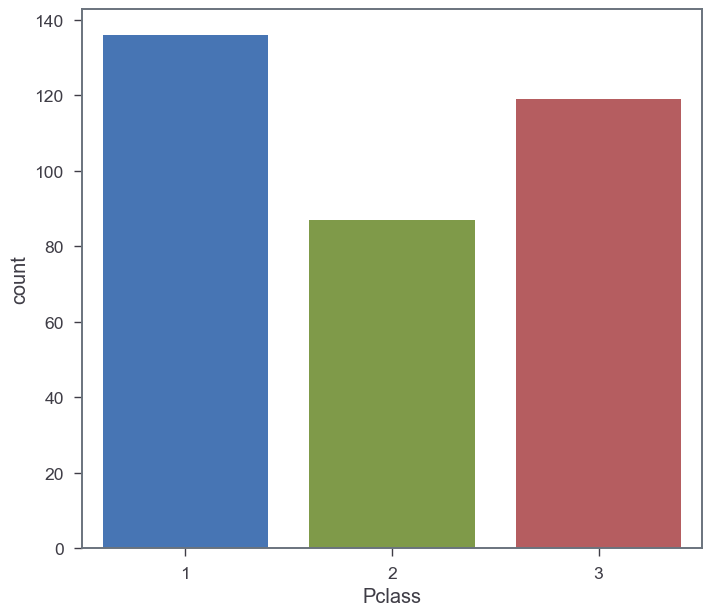

In [17]:
sns.countplot(x= 'Pclass',data =survived_df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

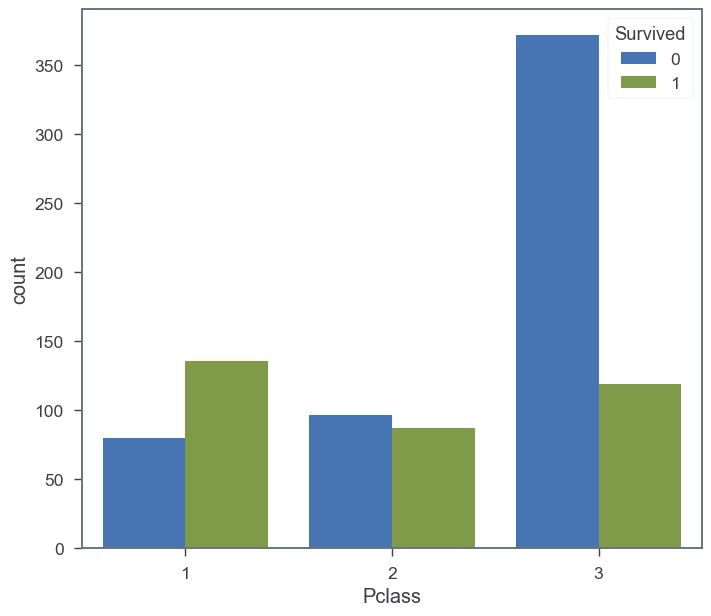

In [18]:
sns.countplot(x= 'Pclass',hue ='Survived',data =df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

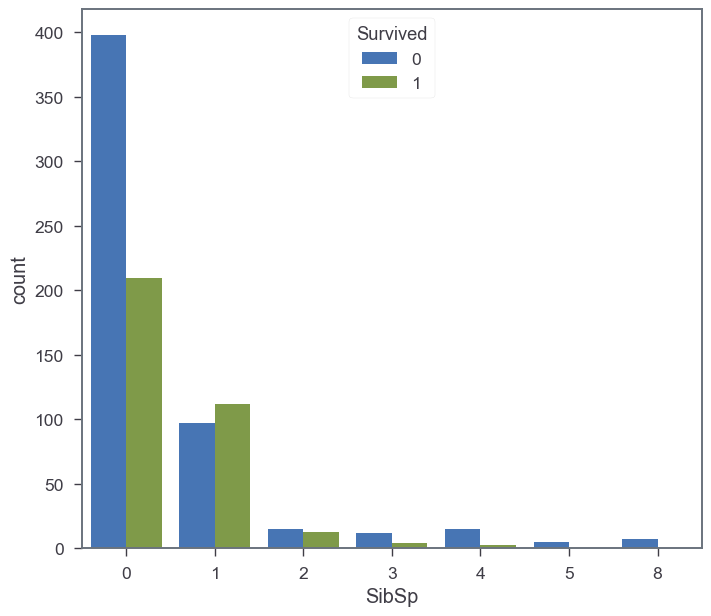

In [19]:
sns.countplot(x= 'SibSp',hue='Survived',data =df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

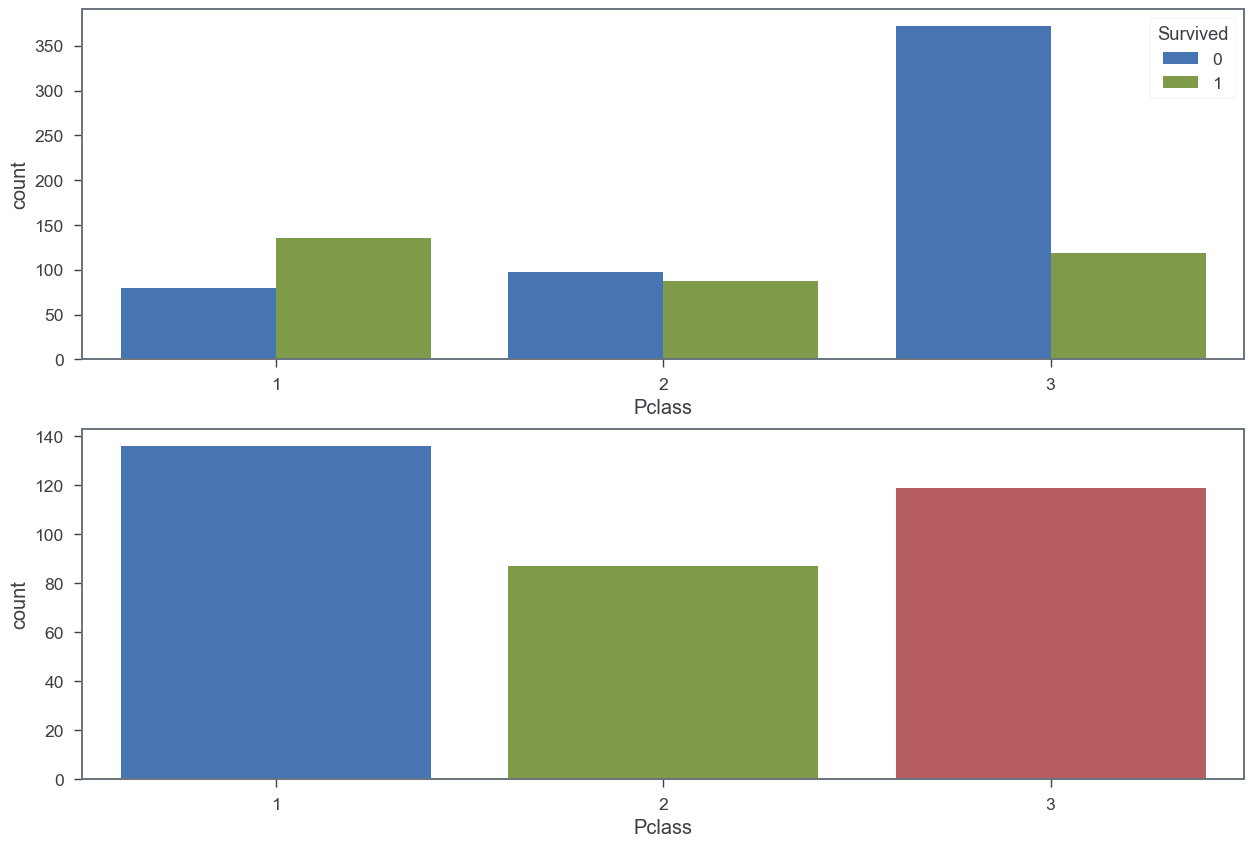

In [20]:
plt.figure(figsize = [15,10])
plt.subplot(211)
sns.countplot(x= 'Pclass',hue ='Survived',data =df)

plt.subplot(212)
#sns.countplot(x= 'SibSp',data =survived_df)
sns.countplot(x= 'Pclass',data =survived_df)


<AxesSubplot:xlabel='SibSp', ylabel='count'>

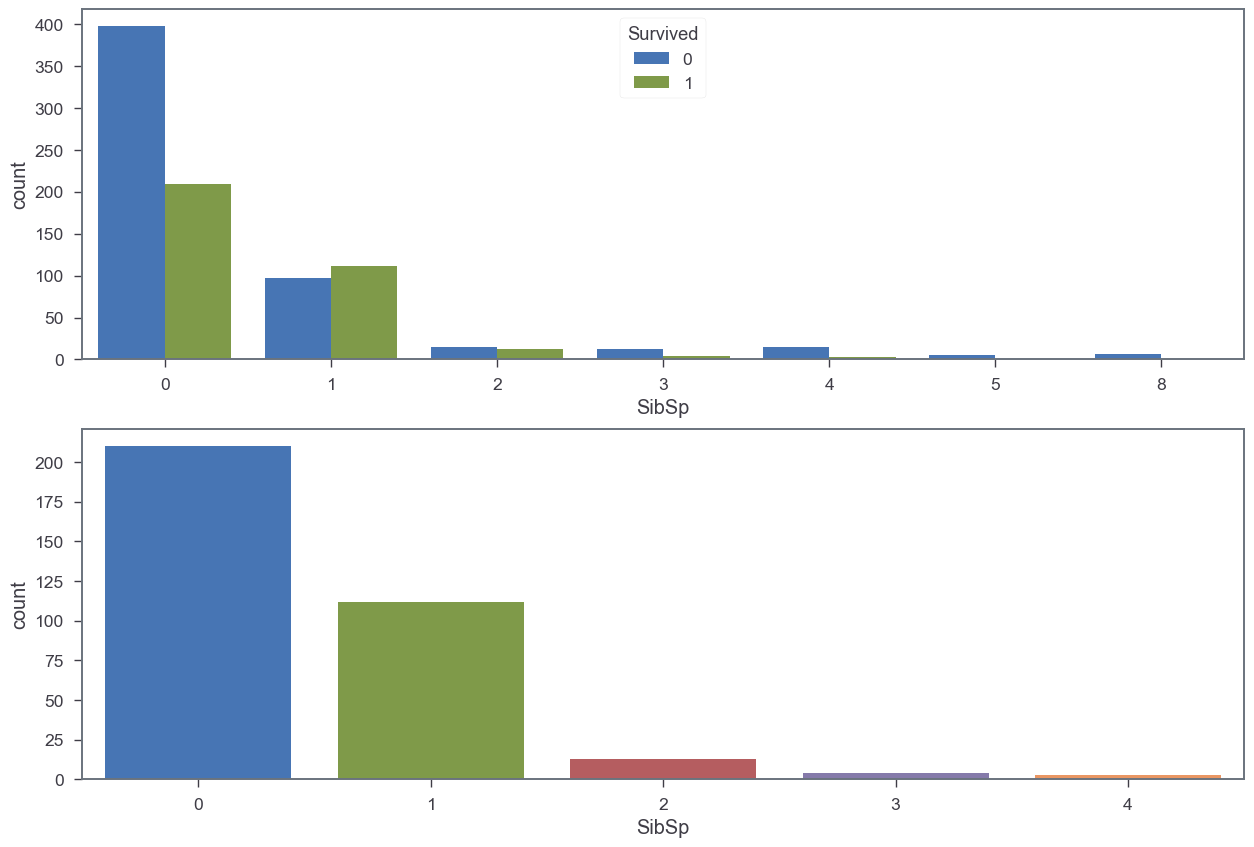

In [21]:
plt.figure(figsize = [15,10])
plt.subplot(211)
sns.countplot(x= 'SibSp',hue ='Survived',data =df)

plt.subplot(212)
#sns.countplot(x= 'SibSp',data =survived_df)
sns.countplot(x= 'SibSp',data =survived_df)


<AxesSubplot:xlabel='Parch', ylabel='count'>

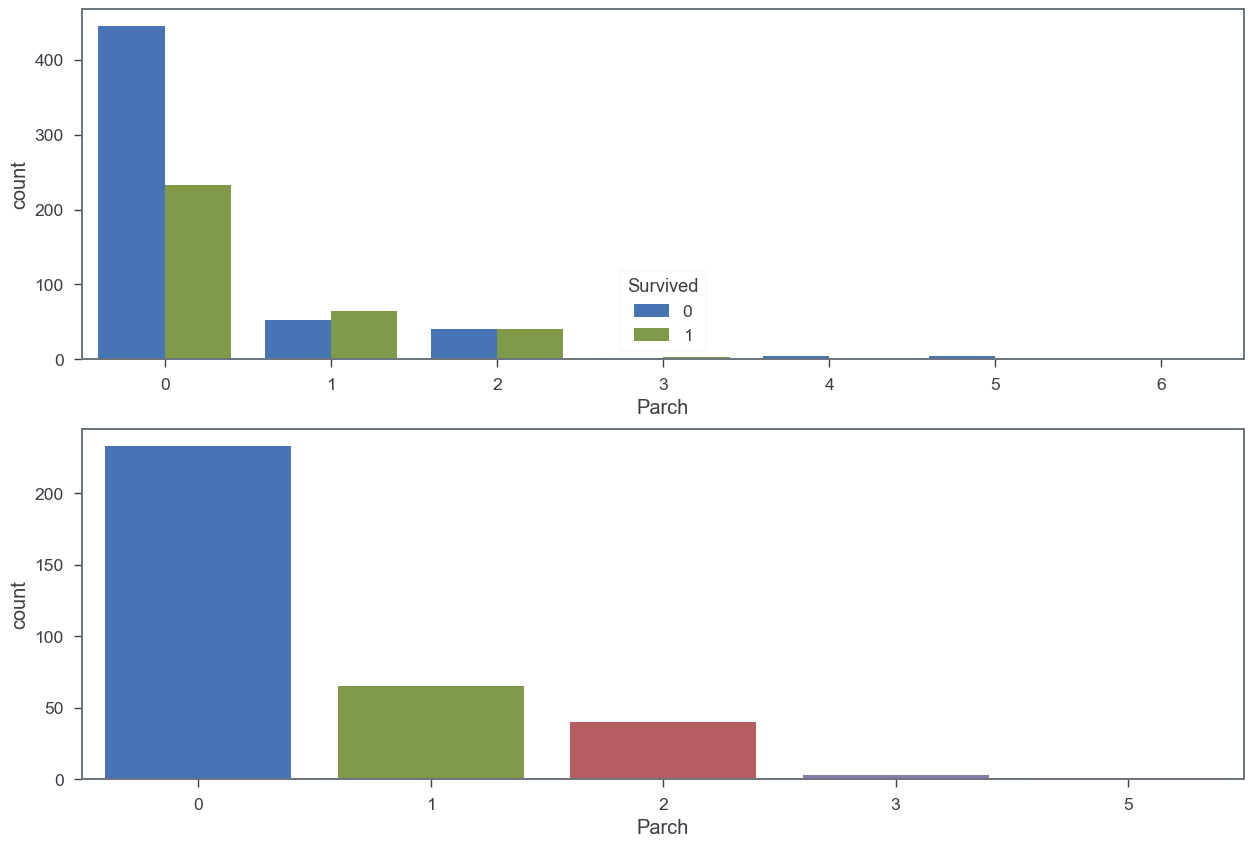

In [22]:
plt.figure(figsize = [15,10])
plt.subplot(211)
sns.countplot(x= 'Parch',hue ='Survived',data =df)

plt.subplot(212)
#sns.countplot(x= 'SibSp',data =survived_df)
sns.countplot(x= 'Parch',data =survived_df)


<AxesSubplot:xlabel='Sex', ylabel='count'>

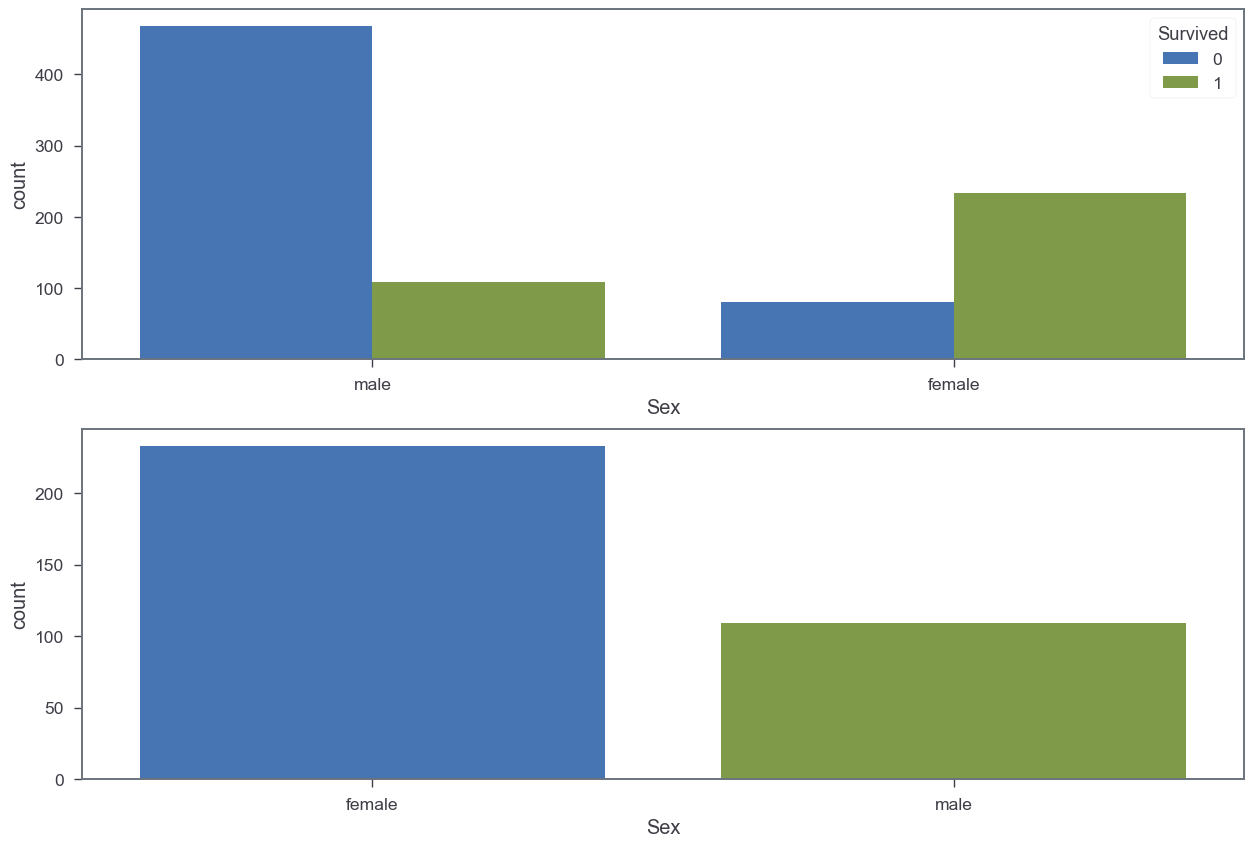

In [23]:
plt.figure(figsize = [15,10])
plt.subplot(211)
sns.countplot(x= 'Sex',hue ='Survived',data =df)

plt.subplot(212)
#sns.countplot(x= 'SibSp',data =survived_df)
sns.countplot(x= 'Sex',data =survived_df)


<AxesSubplot:>

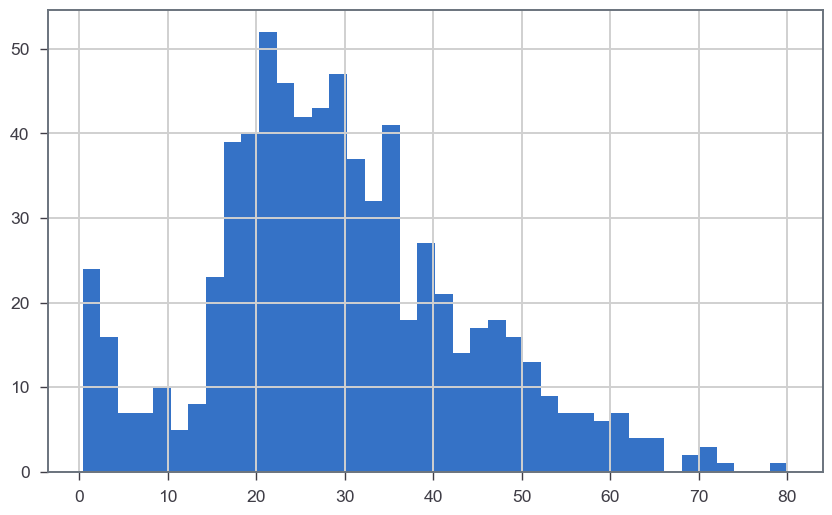

In [24]:
plt.figure(figsize=[10,6])
df['Age'].hist(bins=40)

<AxesSubplot:>

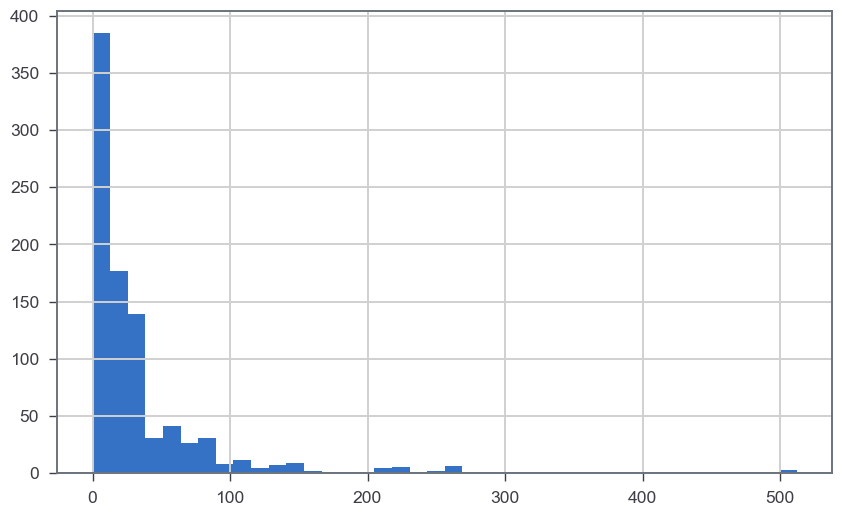

In [25]:
plt.figure(figsize=[10,6])
df['Fare'].hist(bins=40)

In [26]:
#data cleaning and feture engeneering

<AxesSubplot:>

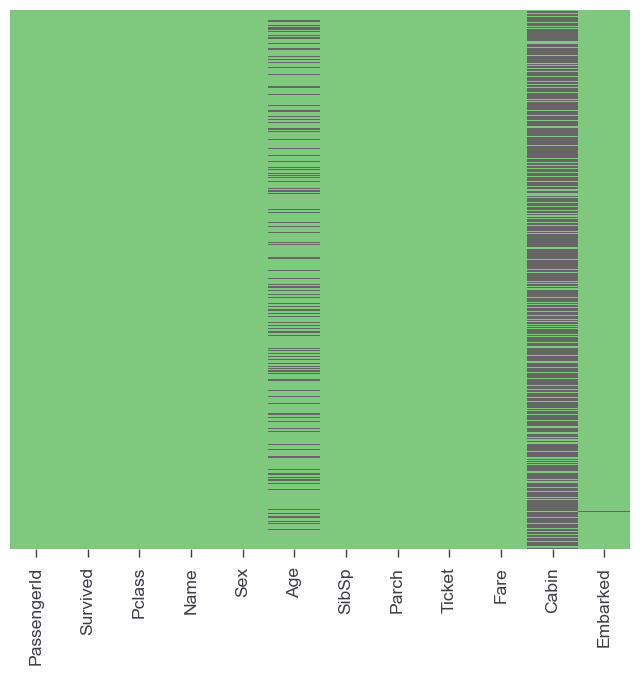

In [27]:
sns.heatmap(df.isnull(), yticklabels= False, cbar= False,cmap='Accent')

In [28]:
df.drop('Cabin',axis = 1,inplace= True)

In [29]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [30]:
df2 = df.drop(['PassengerId','Ticket','Embarked','Name'],axis = 1)

In [31]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


<AxesSubplot:>

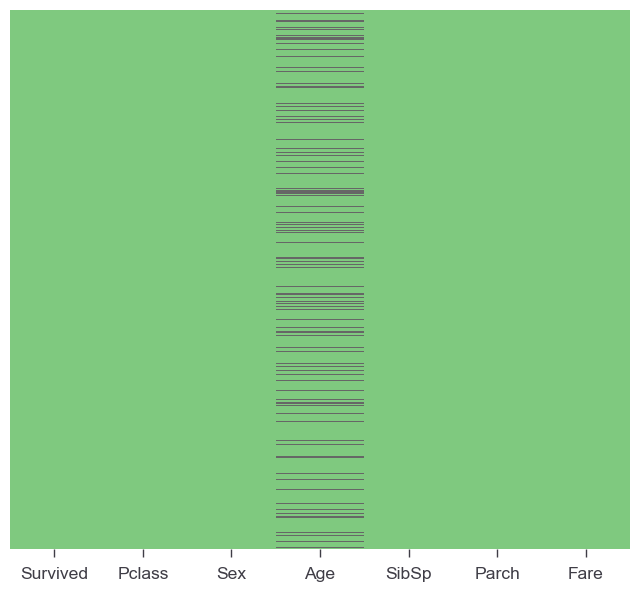

In [32]:
sns.heatmap(df2.isnull(), yticklabels= False, cbar= False,cmap='Accent')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

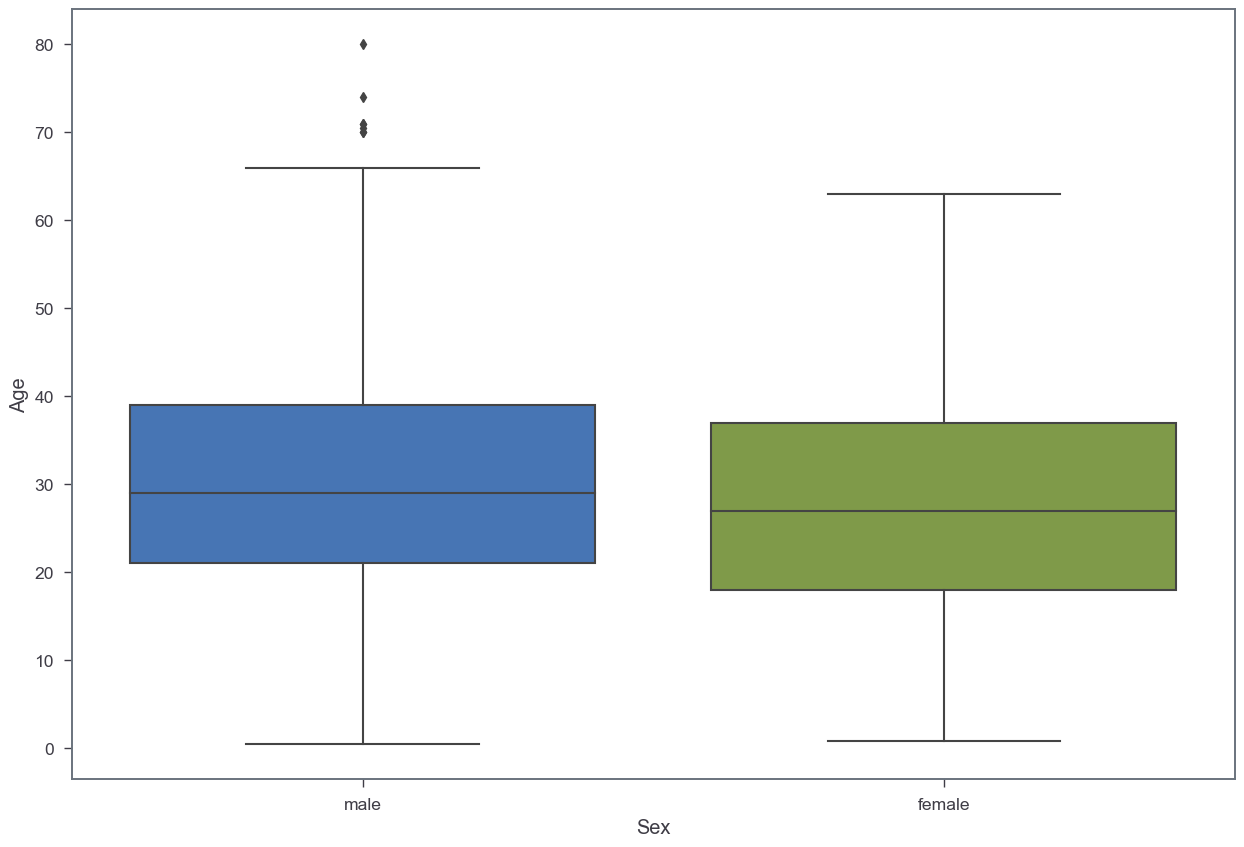

In [33]:
plt.figure(figsize=(15,10))
sns.boxplot(x = 'Sex', y ='Age',data = df2)

In [34]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [35]:
def fillage(data):
    age = data[0]
    sex = data[1]  
    
    if pd.isnull(age):
        if sex == 'male':
            age = 29
        else:
            age = 25
        
    else: 
        return age

In [36]:
def fillagenew(df):
    #age = data[0]
    #sex = data[1]
    
    if df['Age'].isnull():
        if  df['Sex'] == 'male':
            age = 29
        else:
            age = 25
        
    else: 
        age == age

In [37]:
def fillagenew(df):
    for index, row in df.iterrows():
        if pd.isnull(row['Age']):
            if row['Sex'] == 'male':
                df.loc[index, 'Age'] = 29
            else:
                df.loc[index, 'Age'] = 25


In [38]:
def fillagenew(df):
    for index, row in df.iterrows():
        age = row['Age']
        sex = row['Sex']
    
        if pd.isnull(age):
            if sex == 'male':
                df.loc[index, 'Age'] = 29
            else:
                df.loc[index, 'Age'] = 25
    
    return df

In [39]:
df3 = fillagenew(df2.copy())

<AxesSubplot:>

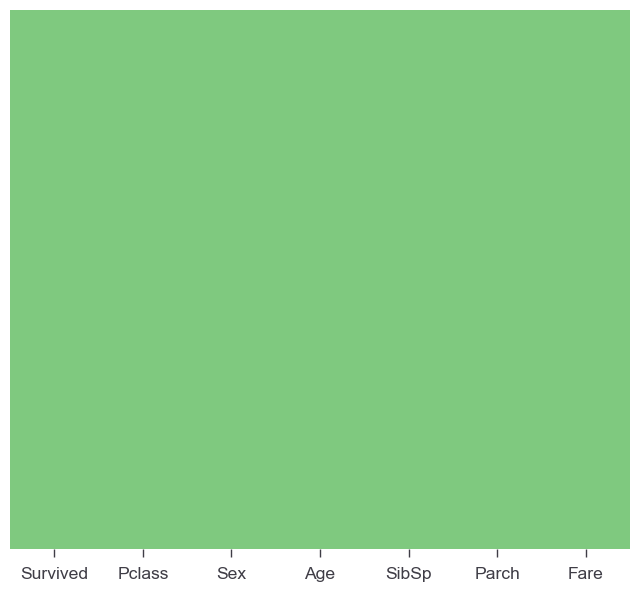

In [40]:
sns.heatmap(df3.isnull(), yticklabels= False, cbar= False,cmap='Accent')

In [41]:
df3

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,25.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [42]:
pd.get_dummies(df3['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [43]:
male = pd.get_dummies(df3['Sex'], drop_first = True)

In [44]:
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


df3.drop()

In [45]:
df3

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,25.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [46]:
df3 = df3.drop(columns=['Sex'])

In [47]:
df3['Male'] = male

In [48]:
df3

,Survived,Pclass,Age,SibSp,Parch,Fare,Male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,25.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [49]:
#train logistic regression clasifier


In [50]:
X = df3.drop('Survived',axis =1 ).values
y = df['Survived'].values

In [51]:
X

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  1.    ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    , 25.    ,  1.    ,  2.    , 23.45  ,  0.    ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ,  1.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ,  1.    ]])

In [52]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test ,y_train ,y_test = train_test_split(X,y, test_size=0.2, random_state =10)

In [55]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [56]:
classifier

LogisticRegression(random_state=0)

In [57]:
# asessing model performance

In [58]:
y_predict_test = classifier.predict(X_test)

In [59]:
y_predict_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

<AxesSubplot:>

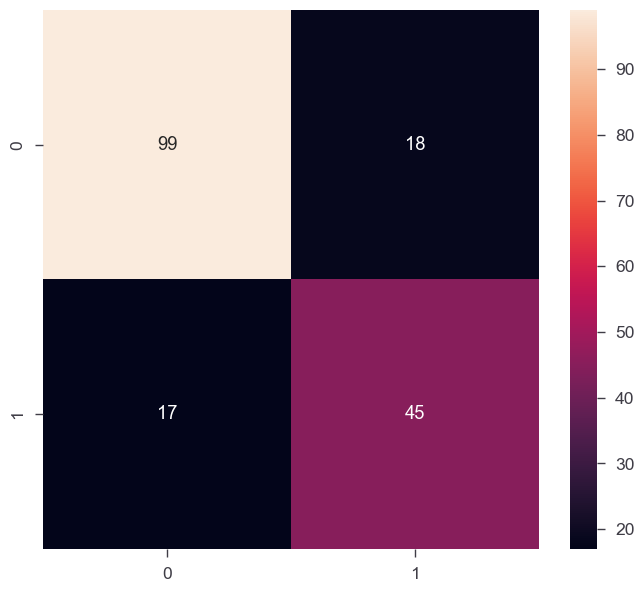

In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm, annot = True ,fmt = 'd')

<AxesSubplot:>

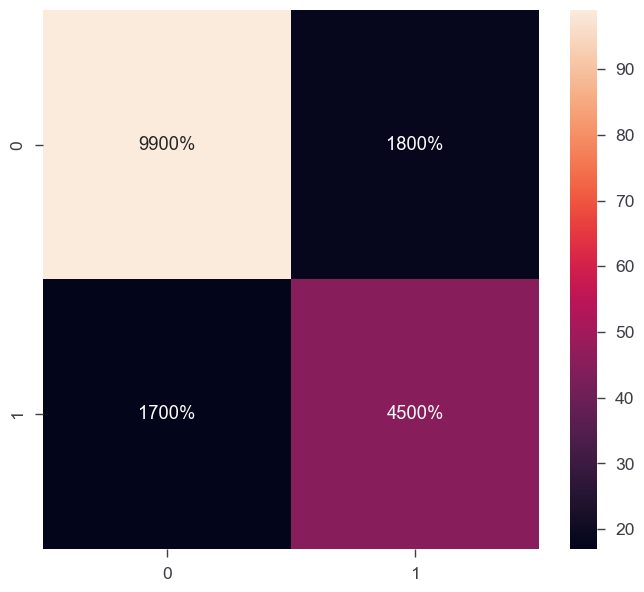

In [61]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm, annot = True ,fmt = '.0%')

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.71      0.73      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.80      0.80       179



In [63]:
#naive bayes

In [64]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [66]:
y_predict_test = classifier.predict(X_test)

In [67]:
cm2 = confusion_matrix(y_test,y_predict_test)

In [68]:
cm2

array([[105,  12],
       [ 29,  33]], dtype=int64)

<AxesSubplot:>

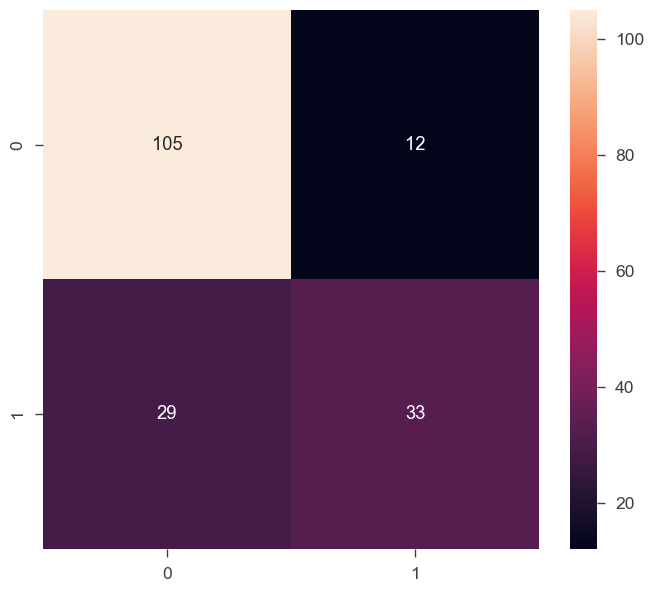

In [71]:
sns.heatmap(cm2,annot = True,fmt = 'd')

In [72]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       117
           1       0.73      0.53      0.62        62

    accuracy                           0.77       179
   macro avg       0.76      0.71      0.73       179
weighted avg       0.77      0.77      0.76       179

